In [385]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

In [386]:
# 파일 가져오기

file_name = 'C:/Users/abc99/OneDrive/바탕 화면/2023 2학기 파일 전체 모음/딥러닝응용/raisin/Raisin_Dataset.xlsx'
df = pd.read_excel(file_name)
print(df)

      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    0.684130   1121.786  Kecimen  
2  

In [387]:
data = df

In [388]:
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [389]:
# data null값 측정하기

data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [390]:
from sklearn.preprocessing import LabelEncoder

# 수치 변환

le=LabelEncoder()
for i in data.columns:

    data[i]=le.fit_transform(data[i])
    
y1 = le.fit_transform(y)
#Y = pd.get_dummies(y).values

print(data)

     Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  Extent  \
0     551              553              500           558         542     811   
1     404              446              409           469         413     299   
2     583              554              581           448         571     102   
3      74               54              159           108          68     394   
4     462              254              709            33         445     890   
..    ...              ...              ...           ...         ...     ...   
895   504              512              449           542         492     215   
896   549              546              540           508         549      99   
897   640              517              739           174         650     722   
898   600              633              506           683         600     177   
899   529              706              200           877         532      82   

     Perimeter  Class  
0  

In [391]:
# X, y set 분류하기

X = data.drop(columns=['Class'], axis=1).values
y = data['Class'].values

In [392]:
# class 개수를 파악하기

data['Class'].value_counts()

1    450
0    450
Name: Class, dtype: int64

In [393]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [394]:
# n_features : represents the number of features you want to have for each time step
n_features = 1

# Make X to 3D format
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [395]:
X.shape

(900, 7, 1)

In [396]:
import numpy as np

# Make Y suitable for X.shape
Y = np.argmax(Y, axis=1).reshape(-1, 1)

In [397]:
Y.shape

(900, 1)

In [399]:
# X.shape[0] = rows, X.shape[1] = columns(In code, it's features)
n_steps = X.shape[1]
n_steps

7

In [400]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [401]:
# Make model
def build_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu',input_shape = (n_steps, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(70, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.02), metrics=['accuracy'])
    
    return model

model = build_model()

model.summary()

print("input_shape => ", n_steps, n_features)

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_59 (Conv1D)          (None, 6, 64)             192       
                                                                 
 max_pooling1d_56 (MaxPoolin  (None, 3, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_60 (Conv1D)          (None, 2, 64)             8256      
                                                                 
 max_pooling1d_57 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 flatten_36 (Flatten)        (None, 64)                0         
                                                                 
 dense_126 (Dense)           (None, 70)              

In [402]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=16,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

# Make equal Input, Output(test, pred)
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Used In binary results
y_test_class = (y_test_flat > 0.5).astype(int)
y_pred_class = (y_pred_flat > 0.5).astype(int)

Epoch 1/100
45/45 [==============================] - 1s 7ms/step - loss: 3.6556 - accuracy: 0.6139 - val_loss: 0.9355 - val_accuracy: 0.7667
Epoch 2/100
45/45 [==============================] - 0s 3ms/step - loss: 0.7527 - accuracy: 0.7431 - val_loss: 0.5955 - val_accuracy: 0.7444
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.7611 - val_loss: 0.5985 - val_accuracy: 0.7500
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.7625 - val_loss: 0.8634 - val_accuracy: 0.7056
Epoch 5/100
45/45 [==============================] - 0s 3ms/step - loss: 0.5180 - accuracy: 0.7931 - val_loss: 0.5997 - val_accuracy: 0.7667
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.7931 - val_loss: 0.4834 - val_accuracy: 0.7889
Epoch 7/100
45/45 [==============================] - 0s 3ms/step - loss: 0.5141 - accuracy: 0.7889 - val_loss: 0.6043 - val_accuracy: 0.7444
Epoch 8/100
4

Epoch 59/100
45/45 [==============================] - 0s 3ms/step - loss: 0.3547 - accuracy: 0.8389 - val_loss: 0.4579 - val_accuracy: 0.8444
Epoch 60/100
45/45 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.8472 - val_loss: 0.3809 - val_accuracy: 0.8278
Epoch 61/100
45/45 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.8375 - val_loss: 0.3682 - val_accuracy: 0.8444
Epoch 62/100
45/45 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.8347 - val_loss: 0.4467 - val_accuracy: 0.8333
Epoch 63/100
45/45 [==============================] - 0s 2ms/step - loss: 0.3621 - accuracy: 0.8417 - val_loss: 0.3559 - val_accuracy: 0.8833
Epoch 64/100
45/45 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8444 - val_loss: 0.4208 - val_accuracy: 0.8278
Epoch 65/100
45/45 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.8444 - val_loss: 0.3515 - val_accuracy: 0.8611
Epoch 

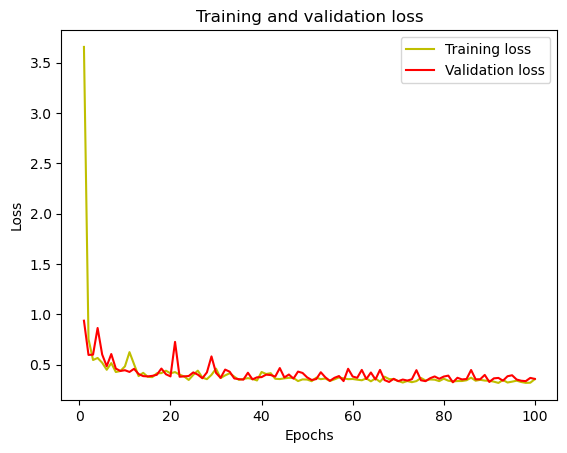

In [403]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()     

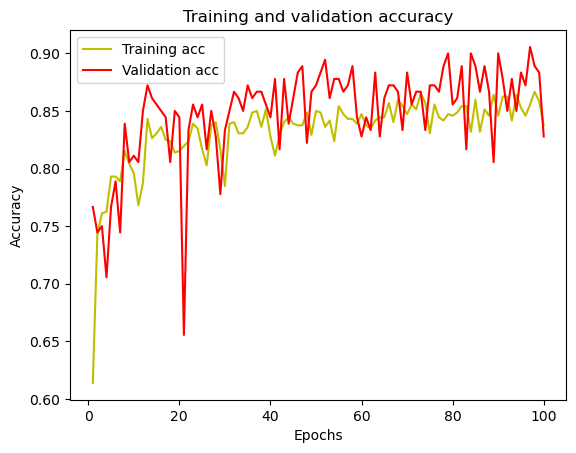

In [404]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [405]:
# F1 score
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        97
           1       0.91      0.70      0.79        83

    accuracy                           0.83       180
   macro avg       0.85      0.82      0.82       180
weighted avg       0.84      0.83      0.82       180

[[91  6]
 [25 58]]
